In [314]:
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [315]:
df= pd.read_csv('housing.txt',delimiter=r"\s+", header=None,)

In [316]:
df.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV' ]

In [317]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [318]:
# we did not find any missing value.
# we will the correlation
df[df.columns[0:]].corr()['MEDV'][:-1]

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
Name: MEDV, dtype: float64

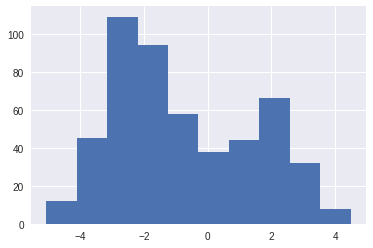

In [319]:
# CRIM's distribution has right skewed so we transform it. Now it is roughly normally distributed.
df['CRIM'] = np.log(df['CRIM'])
df['CRIM'].hist()

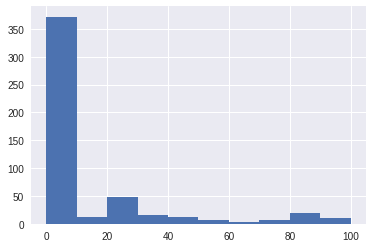

In [320]:
# From the above description we find that 'ZN' sre right skewed.
df['ZN'].hist()

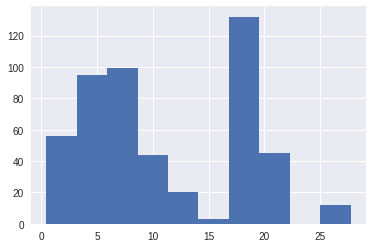

In [321]:
# for the INDUS
df['INDUS'].hist()

In [322]:
# lets see how many tracs are the river free.
len(df[df['CHAS'] == 0])

471

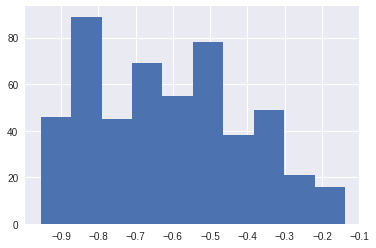

In [323]:
df['NOX'] = np.log(df['NOX'])
df['NOX'].hist()

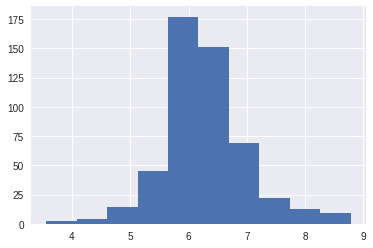

In [324]:
# This is normally distributed because mean and the median are almost same and std deviation is low.
df['RM'].hist()

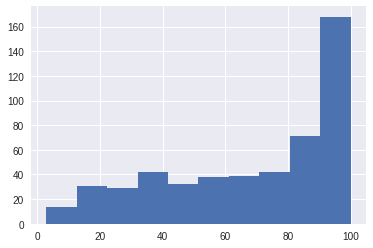

In [325]:
# mean is less than the median so we can say that it is left skewed distribution.
df['AGE'].hist()

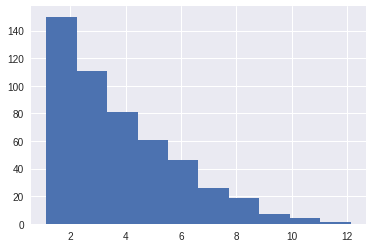

In [326]:
df['DIS'].hist(bins=10)


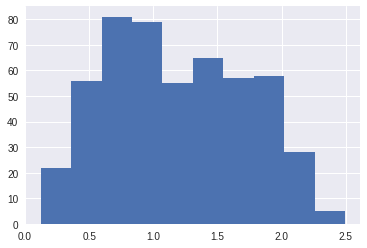

In [327]:
df['DIS'] = np.log(df['DIS'])
df['DIS'].hist()

# Now DIS is roughly normally distributed

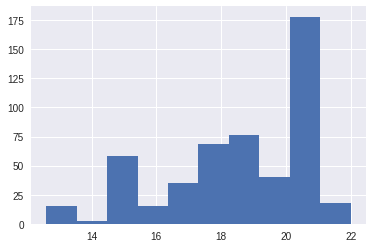

In [328]:
df['PTRATIO'].hist()


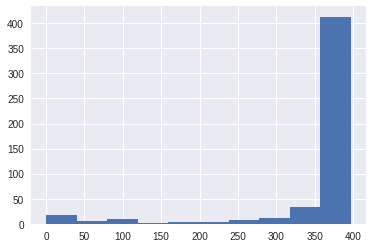

In [329]:
df['B'].hist()

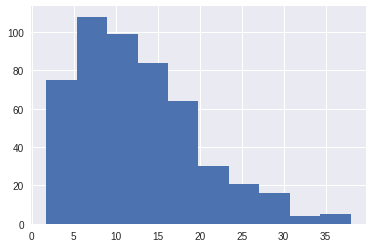

In [330]:
df['LSTAT'].hist()

In [331]:







df['LSTAT'] = np.cbrt(df['LSTAT'])

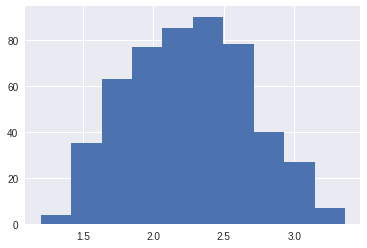

In [332]:
df['LSTAT'].hist()

In [333]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.cross_validation import train_test_split ,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [334]:
from sklearn.preprocessing import StandardScaler

In [335]:
data = df.values
X = data[:,:-1]
Y = data[:,-1]

In [336]:
scale = StandardScaler()
x_train,x_test,y_train,y_test = train_test_split(X,Y)
train_x = scale.fit_transform(x_train)
test_x = scale.fit_transform(x_test)

In [337]:
model = LinearRegression(fit_intercept=True)
model_fit = model.fit(train_x,y_train)

In [338]:
score = model_fit.score(train_x,y_train)
print("Mean accuracy of LinearRegression is : {0}".format(score))

Mean accuracy of LinearRegression is : 0.7797914022519591


In [339]:
from sklearn.preprocessing import PolynomialFeatures
quadratic_featurizer = PolynomialFeatures(degree=3)
x_train_quadratic = quadratic_featurizer.fit_transform(x_train)
x_test_quadratic = quadratic_featurizer.transform(x_test)

In [340]:
quardetic_model = LinearRegression()
quard_fit =quardetic_model.fit(x_train_quadratic,y_train)

In [341]:
score = quard_fit.score(x_train_quadratic,y_train)
print("Mean accuracy of LinearRegression is : {0}".format(score))
prediction = quardetic_model.predict(x_test_quadratic)


Mean accuracy of LinearRegression is : 0.999999999999993


In [343]:
from sklearn import linear_model

In [346]:
clf = linear_model.Lasso(alpha=0.1)
clf.fit(x_train_quadratic,y_train)


/home/lalit/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [347]:
score = clf.score(x_train_quadratic,y_train)
print("Mean accuracy of LinearRegression is : {0}".format(score))

Mean accuracy of LinearRegression is : 0.9605278334797914


In [348]:
from sklearn.linear_model import Ridge

In [353]:
clf1 = Ridge(alpha=1.0)
clf1.fit(x_train_quadratic, y_train)

/home/lalit/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [354]:
score = clf1.score(x_train_quadratic,y_train)
print("Mean accuracy of LinearRegression is : {0}".format(score))

Mean accuracy of LinearRegression is : 0.9792518220232179


In [358]:
scores = cross_val_score(clf,x_train_quadratic,y_train, cv=5)
scores 

/home/lalit/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/lalit/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/lalit/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/lalit/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not conver

array([ 0.85802399,  0.88934652,  0.91708192,  0.86262198,  0.76290218])

In [360]:
scores = cross_val_score(model,train_x,y_train, cv=5)
scores 

array([ 0.69979768,  0.70762428,  0.81197612,  0.6952851 ,  0.77270311])